In [2]:
!pip install pandas_datareader 

     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\sitra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed


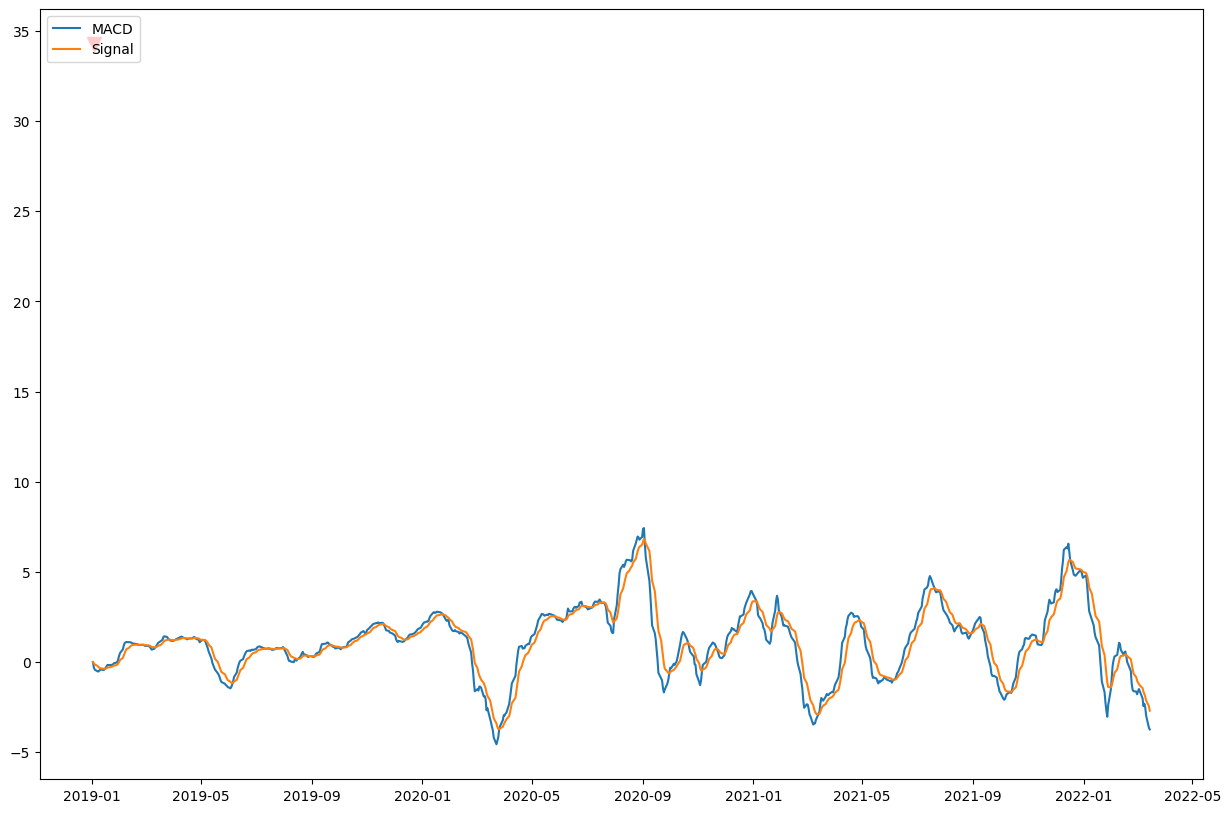

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

# Download historical data for a security
symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2022-03-16"
df = pdr.get_data_yahoo(symbol, start_date, end_date)

# Calculate the MACD and signal curve
ema_12 = df["Adj Close"].ewm(span=12, adjust=False).mean()
ema_26 = df["Adj Close"].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()

# Plot the MACD and signal curve
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df.index, macd, label="MACD")
ax.plot(df.index, signal, label="Signal")
ax.legend(loc="upper left")

# Determine entry and exit points based on the MACD and signal curve
df["Position"] = np.where(macd > signal, 1, 0)
df["Position"] = np.where(macd < signal, -1, df["Position"])
df["Trade"] = df["Position"].diff()
df["Buy"] = np.where(df["Trade"] == 1, df["Adj Close"], np.nan)
df["Sell"] = np.where(df["Trade"] == -1, df["Adj Close"], np.nan)

# Plot the entry and exit points
ax.plot(df.index, df["Buy"], marker="^", markersize=10, color="g", linestyle="None")
ax.plot(df.index, df["Sell"], marker="v", markersize=10, color="r", linestyle="None")
plt.show()
